Chapter 15
# NumPy常见运算
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

## 导入包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib import cm 
import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

## 自定义函数

In [122]:
def visualize_2D(array, title, vmax, vmin):
    
    fig_width  = math.ceil(array.shape[1] * 0.5)
    fig_length = math.ceil(array.shape[0] * 0.5)
    
    fig, ax = plt.subplots(figsize=(fig_width, fig_length))
    # 注意，seaborn.heatmap() 目前只能接受2D数组
    # 本书中，一维数组可视化时用圆圈
    # 可视化时，只有二维、三维数组用方块
    
    sns.heatmap(array, 
                vmax = vmax,
                vmin = vmin,
                annot = True,      # 增加注释
                fmt = ".2f",       # 注释数值的格式
                square = True,     # 热图方格为正方形
                cmap = 'RdYlBu_r', # 指定色谱
                linewidths = .5,   # 方格线宽
                cbar = False,      # 不显示色谱条
                yticklabels=False, # 不显示纵轴标签
                xticklabels=False, # 不显示横轴标签
                ax = ax)           # 指定绘制热图的轴
    
    fig.savefig('Figures/' + title + '.svg', format='svg')

# 定义绘制一元数组可视化函数

def visualize_1D(array, title, vmax, vmin):
    fig, ax = plt.subplots()
    
    cmap = plt.colormaps.get_cmap("RdYlBu")
    
    array_norm = (array - vmin) / (vmax - vmin)

    colors = cmap(array_norm)

    for idx in range(len(array)):

        circle_idx = plt.Circle((idx, 0), 0.5, facecolor=colors[idx], edgecolor = 'w')
        ax.add_patch(circle_idx)
        ax.text(idx, 0, s = "{:.1f}".format(array[idx]),
                horizontalalignment = 'center',
                verticalalignment = 'center')

    ax.set_xlim(-0.6, 0.6 + len(array))
    ax.set_ylim(-0.6, 0.6)
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')
    fig.savefig('Figures/' + title + '.svg', format='svg')

## 加减乘除、乘幂

### 一维

#### 定义数组

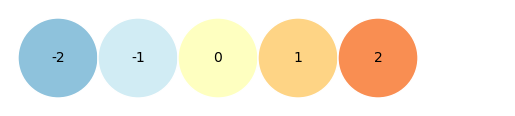

In [3]:
a_1D = np.arange(-2,2+1)
visualize_1D(a_1D, '一维数组', -4, 4)

In [4]:
all_twos = 2*np.ones_like(a_1D)
all_twos

array([2, 2, 2, 2, 2])

In [34]:
np.full_like(a_1D, 2)

array([2, 2, 2, 2, 2])

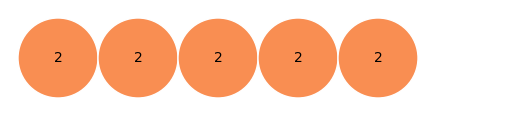

In [5]:
visualize_1D(all_twos, '一维数组，全2', -4, 4)

#### 加法

In [6]:
a_1D + all_twos

array([0, 1, 2, 3, 4])

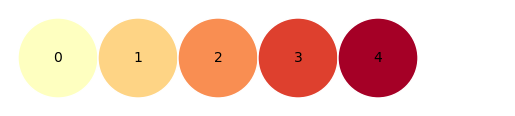

In [7]:
visualize_1D(a_1D + all_twos, '一维数组，加法', -4, 4)

In [8]:
np.add(a_1D, all_twos)

array([0, 1, 2, 3, 4])

#### 减法

In [9]:
a_1D - all_twos

array([-4, -3, -2, -1,  0])

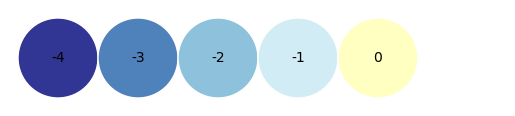

In [10]:
visualize_1D(a_1D - all_twos, '一维数组，减法', -4, 4)

In [11]:
np.subtract(a_1D, all_twos)

array([-4, -3, -2, -1,  0])

#### 乘法

In [12]:
a_1D * all_twos

array([-4, -2,  0,  2,  4])

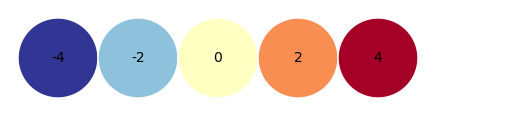

In [13]:
visualize_1D(a_1D * all_twos, '一维数组，乘法', -4, 4)

In [14]:
np.multiply(a_1D, all_twos)

array([-4, -2,  0,  2,  4])

#### 除法

In [15]:
a_1D/all_twos

array([-1. , -0.5,  0. ,  0.5,  1. ])

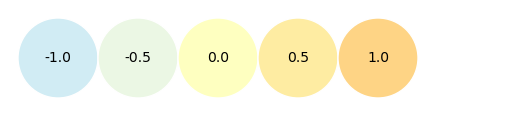

In [16]:
visualize_1D(a_1D/all_twos, '一维数组，除法', -4, 4)

In [17]:
np.divide(a_1D, all_twos)

array([-1. , -0.5,  0. ,  0.5,  1. ])

#### 乘幂

In [18]:
a_1D ** all_twos

array([4, 1, 0, 1, 4])

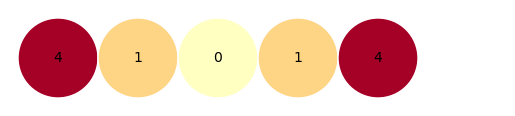

In [19]:
visualize_1D(a_1D ** all_twos, '一维数组，乘幂', -4, 4)

In [20]:
np.power(a_1D,all_twos)

array([4, 1, 0, 1, 4])

### 二维数组

In [75]:
a_2D = np.random.uniform(-1, 1, (4,6))
a_2D

array([[ 0.6391556 ,  0.95224626, -0.61295641, -0.48545067, -0.43084599,
         0.87781143],
       [-0.86419333, -0.19204597,  0.33640025,  0.94593556,  0.24107051,
         0.21652763],
       [ 0.34992486, -0.24471072,  0.11767816, -0.43756292,  0.0671183 ,
         0.83192725],
       [-0.68293344, -0.16157024, -0.66423099,  0.5000902 , -0.28232899,
        -0.76968265]])

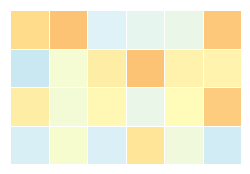

In [76]:
visualize_2D(a_2D, '二维数组', 3, -3)

In [61]:
all_twos_2D = np.full_like(a_2D, 2)
all_twos_2D

array([[2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.]])

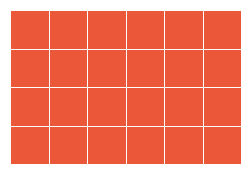

In [86]:
visualize_2D(all_twos_2D, '二维，全2', 3, -3)

#### 加法

In [77]:
a_2D + all_twos_2D

array([[2.6391556 , 2.95224626, 1.38704359, 1.51454933, 1.56915401,
        2.87781143],
       [1.13580667, 1.80795403, 2.33640025, 2.94593556, 2.24107051,
        2.21652763],
       [2.34992486, 1.75528928, 2.11767816, 1.56243708, 2.0671183 ,
        2.83192725],
       [1.31706656, 1.83842976, 1.33576901, 2.5000902 , 1.71767101,
        1.23031735]])

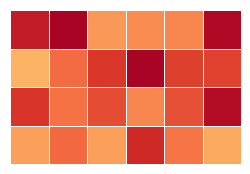

In [78]:
visualize_2D(a_2D + all_twos_2D, '二维加法', 3, -3)

#### 减法

In [64]:
a_2D - all_twos_2D

array([[-1.43646641, -2.97549686, -1.6880573 , -2.68677732, -2.87147646,
        -2.44475814],
       [-1.17020027, -2.73179726, -1.22898272, -1.34564713, -2.12286432,
        -2.33653862],
       [-1.74769853, -2.33826076, -1.12947727, -2.62675825, -1.72857763,
        -1.22995091],
       [-1.19062451, -1.97619001, -1.94987926, -2.54738284, -1.34135024,
        -2.25476876]])

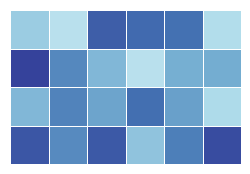

In [79]:
visualize_2D(a_2D - all_twos_2D, '二维减法', 3, -3)

#### 乘法

In [80]:
a_2D * all_twos_2D

array([[ 1.2783112 ,  1.90449252, -1.22591282, -0.97090134, -0.86169198,
         1.75562287],
       [-1.72838666, -0.38409195,  0.67280051,  1.89187111,  0.48214102,
         0.43305527],
       [ 0.69984971, -0.48942143,  0.23535633, -0.87512584,  0.13423659,
         1.6638545 ],
       [-1.36586688, -0.32314047, -1.32846198,  1.0001804 , -0.56465798,
        -1.53936529]])

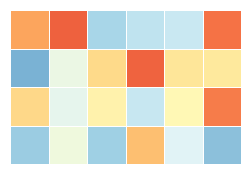

In [81]:
visualize_2D(a_2D * all_twos_2D, '二维乘法', 3, -3)

#### 除法

In [82]:
a_2D / all_twos_2D

array([[ 0.3195778 ,  0.47612313, -0.30647821, -0.24272534, -0.21542299,
         0.43890572],
       [-0.43209666, -0.09602299,  0.16820013,  0.47296778,  0.12053525,
         0.10826382],
       [ 0.17496243, -0.12235536,  0.05883908, -0.21878146,  0.03355915,
         0.41596362],
       [-0.34146672, -0.08078512, -0.33211549,  0.2500451 , -0.1411645 ,
        -0.38484132]])

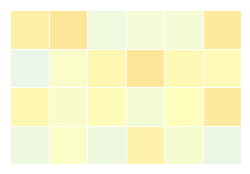

In [83]:
visualize_2D(a_2D / all_twos_2D, '二维除法', 3, -3)

#### 乘幂

In [84]:
a_2D ** all_twos_2D

array([[0.40851988, 0.90677294, 0.37571556, 0.23566235, 0.18562827,
        0.77055291],
       [0.74683011, 0.03688166, 0.11316513, 0.89479408, 0.05811499,
        0.04688422],
       [0.12244741, 0.05988333, 0.01384815, 0.19146131, 0.00450487,
        0.69210295],
       [0.46639808, 0.02610494, 0.4412028 , 0.25009021, 0.07970966,
        0.59241138]])

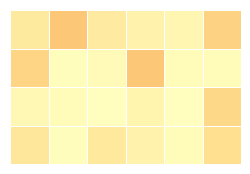

In [85]:
visualize_2D(a_2D ** all_twos_2D, '二维乘幂', 3, -3)

## 广播原则

### 一维

In [21]:
a_1D + 2

array([0, 1, 2, 3, 4])

In [22]:
a_1D - 2

array([-4, -3, -2, -1,  0])

In [23]:
a_1D * 2

array([-4, -2,  0,  2,  4])

In [24]:
a_1D / 2

array([-1. , -0.5,  0. ,  0.5,  1. ])

In [25]:
a_1D ** 2

array([4, 1, 0, 1, 4])

In [26]:
a_1D % 2

array([0, 1, 0, 1, 0], dtype=int32)

### 一维数组、列向量运算

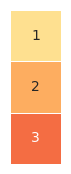

In [106]:
visualize_2D(np.array([[1], [2], [3]]), '列向量，二维', 5, -5)

In [97]:
a_1D + np.array([[1], [2], [3]])

array([[-1,  0,  1,  2,  3],
       [ 0,  1,  2,  3,  4],
       [ 1,  2,  3,  4,  5]])

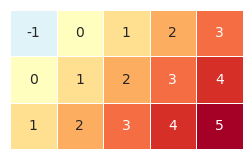

In [108]:
visualize_2D(a_1D + np.array([[1], [2], [3]]), '一维数组、列向量运算，加法', 5, -5)

In [88]:
a_1D * np.array([[1], [2], [3]])

array([[-2, -1,  0,  1,  2],
       [-4, -2,  0,  2,  4],
       [-6, -3,  0,  3,  6]])

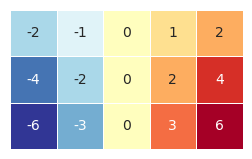

In [109]:
visualize_2D(a_1D * np.array([[1], [2], [3]]), '一维数组、列向量运算，乘法', 5, -5)

In [89]:
a_1D ** np.array([[1], [2], [3]])

array([[-2, -1,  0,  1,  2],
       [ 4,  1,  0,  1,  4],
       [-8, -1,  0,  1,  8]])

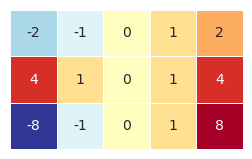

In [110]:
visualize_2D(a_1D ** np.array([[1], [2], [3]]), '一维数组、列向量运算，乘幂', 5, -5)

### 二维数组和标量

#### 加法

In [112]:
a_2D + 2

array([[2.6391556 , 2.95224626, 1.38704359, 1.51454933, 1.56915401,
        2.87781143],
       [1.13580667, 1.80795403, 2.33640025, 2.94593556, 2.24107051,
        2.21652763],
       [2.34992486, 1.75528928, 2.11767816, 1.56243708, 2.0671183 ,
        2.83192725],
       [1.31706656, 1.83842976, 1.33576901, 2.5000902 , 1.71767101,
        1.23031735]])

### 二维数组和一维数组

In [116]:
np.linspace(-1,1,6)

array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])

In [238]:
np.broadcast_to(np.linspace(-1,1,6), (4, 6))

array([[-1. , -0.6, -0.2,  0.2,  0.6,  1. ],
       [-1. , -0.6, -0.2,  0.2,  0.6,  1. ],
       [-1. , -0.6, -0.2,  0.2,  0.6,  1. ],
       [-1. , -0.6, -0.2,  0.2,  0.6,  1. ]])

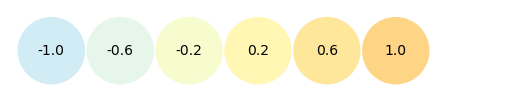

In [120]:
visualize_1D(np.linspace(-1,1,6), '一维数组，6个元素', -4, 4)

In [117]:
a_2D + np.linspace(-1,1,6)

array([[-0.3608444 ,  0.35224626, -0.81295641, -0.28545067,  0.16915401,
         1.87781143],
       [-1.86419333, -0.79204597,  0.13640025,  1.14593556,  0.84107051,
         1.21652763],
       [-0.65007514, -0.84471072, -0.08232184, -0.23756292,  0.6671183 ,
         1.83192725],
       [-1.68293344, -0.76157024, -0.86423099,  0.7000902 ,  0.31767101,
         0.23031735]])

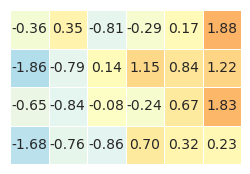

In [123]:
visualize_2D(a_2D + np.linspace(-1,1,6), '二维数组和一维数组，加法', 5, -5)

In [134]:
# 行向量
np.linspace(-1,1,6).reshape(1,-1)

array([[-1. , -0.6, -0.2,  0.2,  0.6,  1. ]])

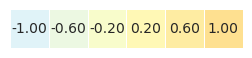

In [137]:
visualize_2D(np.linspace(-1,1,6).reshape(1,-1), '行向量，6个元素', 5, -5)

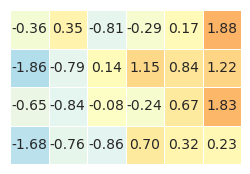

In [135]:
visualize_2D(a_2D + np.linspace(-1,1,6).reshape(1,-1), '二维数组和行向量，加法', 5, -5)

In [124]:
a_2D * np.linspace(-1,1,6)

array([[-0.6391556 , -0.57134776,  0.12259128, -0.09709013, -0.25850759,
         0.87781143],
       [ 0.86419333,  0.11522758, -0.06728005,  0.18918711,  0.14464231,
         0.21652763],
       [-0.34992486,  0.14682643, -0.02353563, -0.08751258,  0.04027098,
         0.83192725],
       [ 0.68293344,  0.09694214,  0.1328462 ,  0.10001804, -0.16939739,
        -0.76968265]])

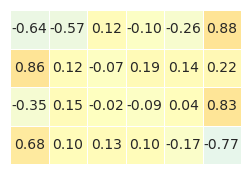

In [125]:
visualize_2D(a_2D * np.linspace(-1,1,6), '二维数组和一维数组，乘法', 5, -5)

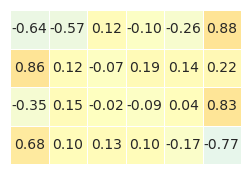

In [136]:
visualize_2D(a_2D * np.linspace(-1,1,6).reshape(1,-1), '二维数组和行向量，乘法', 5, -5)

In [128]:
a_2D + np.array([-2, -1, 0, 1])
# 报错

ValueError: operands could not be broadcast together with shapes (4,6) (4,) 

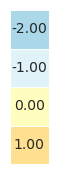

In [133]:
visualize_2D(np.array([[-2], [-1], [0], [1]]), '列向量，4个元素', 5, -5)

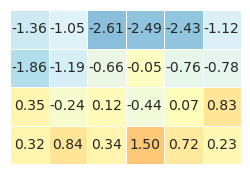

In [139]:
visualize_2D(a_2D + np.array([[-2], [-1], [0], [1]]), '二维数组和列向量，加法', 5, -5)

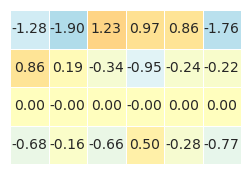

In [138]:
visualize_2D(a_2D * np.array([[-2], [-1], [0], [1]]), '二维数组和列向量，乘法', 5, -5)

### 三维

In [140]:
A_3D = np.arange(-30, 30).reshape(3,4,5)
A_3D

array([[[-30, -29, -28, -27, -26],
        [-25, -24, -23, -22, -21],
        [-20, -19, -18, -17, -16],
        [-15, -14, -13, -12, -11]],

       [[-10,  -9,  -8,  -7,  -6],
        [ -5,  -4,  -3,  -2,  -1],
        [  0,   1,   2,   3,   4],
        [  5,   6,   7,   8,   9]],

       [[ 10,  11,  12,  13,  14],
        [ 15,  16,  17,  18,  19],
        [ 20,  21,  22,  23,  24],
        [ 25,  26,  27,  28,  29]]])

In [141]:
A_3D + 2

array([[[-28, -27, -26, -25, -24],
        [-23, -22, -21, -20, -19],
        [-18, -17, -16, -15, -14],
        [-13, -12, -11, -10,  -9]],

       [[ -8,  -7,  -6,  -5,  -4],
        [ -3,  -2,  -1,   0,   1],
        [  2,   3,   4,   5,   6],
        [  7,   8,   9,  10,  11]],

       [[ 12,  13,  14,  15,  16],
        [ 17,  18,  19,  20,  21],
        [ 22,  23,  24,  25,  26],
        [ 27,  28,  29,  30,  31]]])

In [142]:
A_3D + np.arange(1,5+1)

array([[[-29, -27, -25, -23, -21],
        [-24, -22, -20, -18, -16],
        [-19, -17, -15, -13, -11],
        [-14, -12, -10,  -8,  -6]],

       [[ -9,  -7,  -5,  -3,  -1],
        [ -4,  -2,   0,   2,   4],
        [  1,   3,   5,   7,   9],
        [  6,   8,  10,  12,  14]],

       [[ 11,  13,  15,  17,  19],
        [ 16,  18,  20,  22,  24],
        [ 21,  23,  25,  27,  29],
        [ 26,  28,  30,  32,  34]]])

In [143]:
np.array([[[1, 2, 3, 4, 5]]])

array([[[1, 2, 3, 4, 5]]])

In [144]:
A_3D + np.array([[[1, 2, 3, 4, 5]]])

array([[[-29, -27, -25, -23, -21],
        [-24, -22, -20, -18, -16],
        [-19, -17, -15, -13, -11],
        [-14, -12, -10,  -8,  -6]],

       [[ -9,  -7,  -5,  -3,  -1],
        [ -4,  -2,   0,   2,   4],
        [  1,   3,   5,   7,   9],
        [  6,   8,  10,  12,  14]],

       [[ 11,  13,  15,  17,  19],
        [ 16,  18,  20,  22,  24],
        [ 21,  23,  25,  27,  29],
        [ 26,  28,  30,  32,  34]]])

In [145]:
np.array([[[1]],[[2]],[[3]]])

array([[[1]],

       [[2]],

       [[3]]])

In [146]:
A_3D + np.array([[[1]],[[2]],[[3]]])

array([[[-29, -28, -27, -26, -25],
        [-24, -23, -22, -21, -20],
        [-19, -18, -17, -16, -15],
        [-14, -13, -12, -11, -10]],

       [[ -8,  -7,  -6,  -5,  -4],
        [ -3,  -2,  -1,   0,   1],
        [  2,   3,   4,   5,   6],
        [  7,   8,   9,  10,  11]],

       [[ 13,  14,  15,  16,  17],
        [ 18,  19,  20,  21,  22],
        [ 23,  24,  25,  26,  27],
        [ 28,  29,  30,  31,  32]]])

In [147]:
np.array([[[1],[2],[3],[4]]])

array([[[1],
        [2],
        [3],
        [4]]])

In [148]:
A_3D + np.array([[[1],[2],[3], [4]]])

array([[[-29, -28, -27, -26, -25],
        [-23, -22, -21, -20, -19],
        [-17, -16, -15, -14, -13],
        [-11, -10,  -9,  -8,  -7]],

       [[ -9,  -8,  -7,  -6,  -5],
        [ -3,  -2,  -1,   0,   1],
        [  3,   4,   5,   6,   7],
        [  9,  10,  11,  12,  13]],

       [[ 11,  12,  13,  14,  15],
        [ 17,  18,  19,  20,  21],
        [ 23,  24,  25,  26,  27],
        [ 29,  30,  31,  32,  33]]])

## 数学函数
NumPy有大量数学函数，这个笔记我们仅仅选取几个常用的数学函数，并可视化函数图形。

In [149]:
x_array = np.linspace(-4,4,81)
x_array

array([-4. , -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. ,
       -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9,
       -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8,
       -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,
        0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,
        1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,
        3.7,  3.8,  3.9,  4. ])

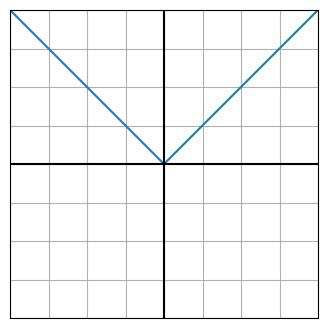

In [154]:
title = '绝对值函数'
visualize_fx(x_array, np.abs(x_array), title)

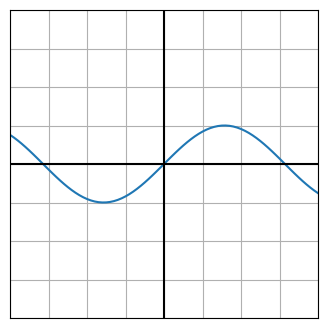

In [155]:
title = '正弦函数'
visualize_fx(x_array, np.sin(x_array), title)

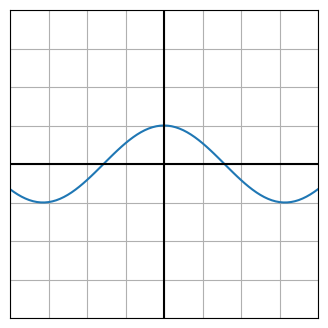

In [156]:
title = '余弦函数'
visualize_fx(x_array, np.cos(x_array), title)

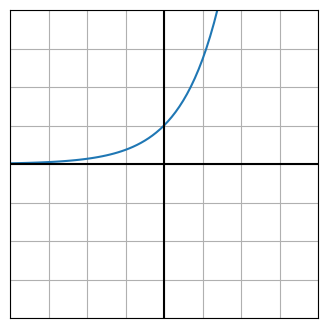

In [157]:
title = '指数函数'
visualize_fx(x_array, np.exp(x_array), title)
# 指数函数通常特指以e为底数的指数函数

In [ ]:
# 请大家可视化更多一元函数

## 统计函数

In [194]:
A_2D = np.random.randint(0,10, size = (4,6))
A_2D

array([[4, 3, 3, 8, 9, 9],
       [0, 8, 2, 4, 1, 1],
       [7, 7, 6, 7, 8, 6],
       [1, 9, 0, 2, 3, 7]])

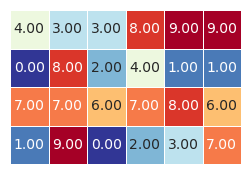

In [195]:
visualize_2D(A_2D, '二维数组', 9, 0)

In [158]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_data_array = iris.data

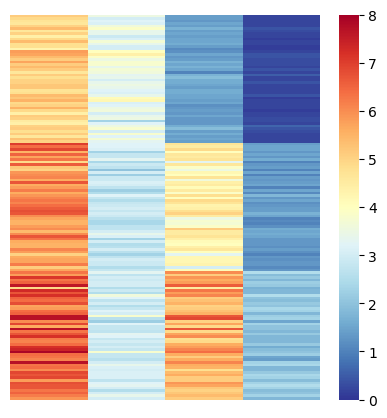

In [159]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (5,5))
sns.heatmap(iris_data_array,   # 鸢尾花数据数组
            cmap = 'RdYlBu_r', # 指定色谱
            ax = ax,           # 指定轴
            vmax = 8,          # 色谱最大值
            vmin = 0,          # 色谱最小值
            xticklabels = [],  # 不显示横轴标签
            yticklabels = [],  # 不显示纵轴标签
            cbar = True)       # 显示色谱条

fig.savefig('Figures/鸢尾花数据热图.svg', format='svg')

### 最大值

In [196]:
A_2D.max()

9

In [197]:
A_2D.max(axis = 0)

array([7, 9, 6, 8, 9, 9])

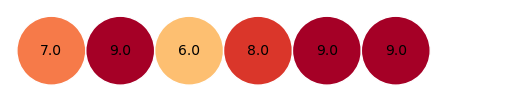

In [198]:
visualize_1D(A_2D.max(axis = 0), '沿axis = 0，最大值', 0, 9)

In [199]:
A_2D.max(axis = 1)

array([9, 8, 8, 9])

In [207]:
A_2D.max(axis = 1, keepdims = True)

array([[9],
       [8],
       [8],
       [9]])

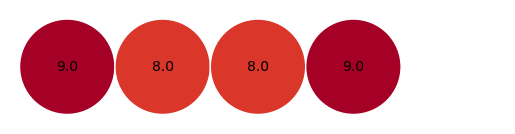

In [208]:
visualize_1D(A_2D.max(axis = 1), '沿axis = 1，最大值', 0, 9)

In [160]:
iris_data_array.max()

7.9

In [161]:
iris_data_array.max(axis = 0)

array([7.9, 4.4, 6.9, 2.5])

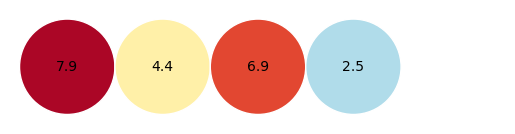

In [182]:
visualize_1D(iris_data_array.max(axis = 0), '鸢尾花沿axis = 0，最大值', 0, 8)

In [162]:
np.argmax(iris_data_array, axis=0)

array([131,  15, 118, 100], dtype=int64)

In [163]:
iris_data_array.max(axis = 1)

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [164]:
np.argmax(iris_data_array, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### 最小值

In [201]:
A_2D.min()

0

In [202]:
A_2D.min(axis = 0)

array([0, 3, 0, 2, 1, 1])

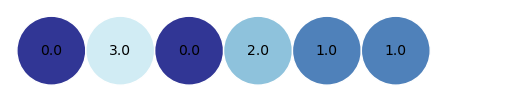

In [204]:
visualize_1D(A_2D.min(axis = 0), '鸢尾花沿axis = 0，最小值', 0, 8)

In [188]:
A_2D.min(axis = 1)

array([-7, -2,  3])

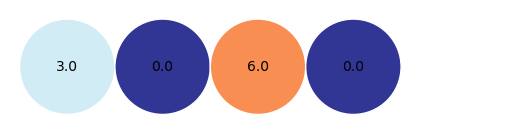

In [206]:
visualize_1D(A_2D.min(axis = 1), '鸢尾花沿axis = 1，最小值', 0, 8)

In [169]:
iris_data_array.min()

0.1

In [170]:
iris_data_array.min(axis = 0)

array([4.3, 2. , 1. , 0.1])

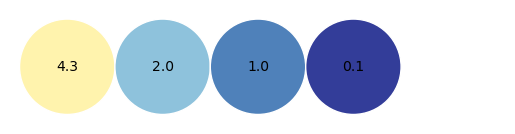

In [172]:
visualize_1D(iris_data_array.min(axis = 0), '沿axis = 0，最小值', 0, 8)

In [173]:
np.argmin(iris_data_array, axis=0)

array([13, 60, 22,  9], dtype=int64)

In [174]:
iris_data_array.min(axis = 1)

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

### 求和

In [ ]:
iris_data_array.sum()

In [ ]:
iris_data_array.sum(axis = 0)

In [ ]:
iris_data_array.sum(axis = 1)

### 平均值
$${\displaystyle \mu ={\frac {1}{n}}\sum _{i=1}^{n}x_{i}.} $$

In [215]:
np.average(iris_data_array)

3.4644999999999997

In [210]:
np.average(iris_data_array, axis = 0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [211]:
np.average(iris_data_array, axis = 1)

array([2.55 , 2.375, 2.35 , 2.35 , 2.55 , 2.85 , 2.425, 2.525, 2.225,
       2.4  , 2.7  , 2.5  , 2.325, 2.125, 2.8  , 3.   , 2.75 , 2.575,
       2.875, 2.675, 2.675, 2.675, 2.35 , 2.65 , 2.575, 2.45 , 2.6  ,
       2.6  , 2.55 , 2.425, 2.425, 2.675, 2.725, 2.825, 2.425, 2.4  ,
       2.625, 2.5  , 2.225, 2.55 , 2.525, 2.1  , 2.275, 2.675, 2.8  ,
       2.375, 2.675, 2.35 , 2.675, 2.475, 4.075, 3.9  , 4.1  , 3.275,
       3.85 , 3.575, 3.975, 2.9  , 3.85 , 3.3  , 2.875, 3.65 , 3.3  ,
       3.775, 3.35 , 3.9  , 3.65 , 3.4  , 3.6  , 3.275, 3.925, 3.55 ,
       3.8  , 3.7  , 3.725, 3.85 , 3.95 , 4.1  , 3.725, 3.2  , 3.2  ,
       3.15 , 3.4  , 3.85 , 3.6  , 3.875, 4.   , 3.575, 3.5  , 3.325,
       3.425, 3.775, 3.4  , 2.9  , 3.45 , 3.525, 3.525, 3.675, 2.925,
       3.475, 4.525, 3.875, 4.525, 4.15 , 4.375, 4.825, 3.4  , 4.575,
       4.2  , 4.85 , 4.2  , 4.075, 4.35 , 3.8  , 4.025, 4.3  , 4.2  ,
       5.1  , 4.875, 3.675, 4.525, 3.825, 4.8  , 3.925, 4.45 , 4.55 ,
       3.9  , 3.95 ,

### 方差
$${\displaystyle \operatorname {Var} (X)={\frac {1}{n - 1}}\sum _{i=1}^{n}(x_{i}-\mu )^{2}}$$

In [212]:
np.var(iris_data_array)
# 注意，NumPy中默认分母为n

3.896056416666667

NumPy默认计算：
$${\displaystyle \operatorname {Var} (X)={\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-\mu )^{2}}$$

In [216]:
np.var(iris_data_array, axis = 0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [219]:
np.var(iris_data_array, axis = 0, ddof = 1)
# 将分母设为n - 1

array([0.68569351, 0.18997942, 3.11627785, 0.58100626])

### 标准差

In [220]:
np.std(iris_data_array, axis = 0)
# 注意，NumPy中默认分母为n

array([0.82530129, 0.43441097, 1.75940407, 0.75969263])

### 协方差矩阵

In [225]:
np.cov(iris_data_array.T, ddof = 1)
# 注意转置

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

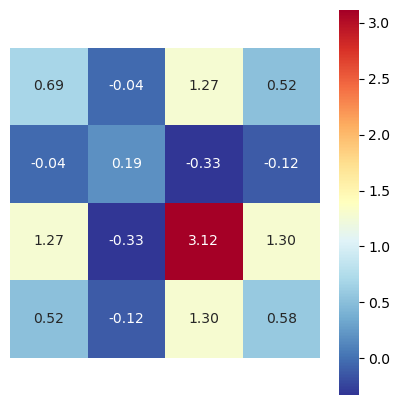

In [231]:

fig, ax = plt.subplots(figsize = (5,5))
sns.heatmap(np.cov(iris_data_array.T, ddof = 1),   
            cmap = 'RdYlBu_r', # 指定色谱
            annot = True,      # 注释
            ax = ax,           # 指定轴
            fmt = ".2f",       # 注释数值的格式
            square = True,     # 热图方格为正方形
            xticklabels = [],  # 不显示横轴标签
            yticklabels = [],  # 不显示纵轴标签
            cbar = True)       # 显示色谱条

fig.savefig('Figures/鸢尾花数据协方差矩阵.svg', format='svg')

### 相关性系数矩阵

In [227]:
np.corrcoef(iris_data_array.T)
# 注意转置

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

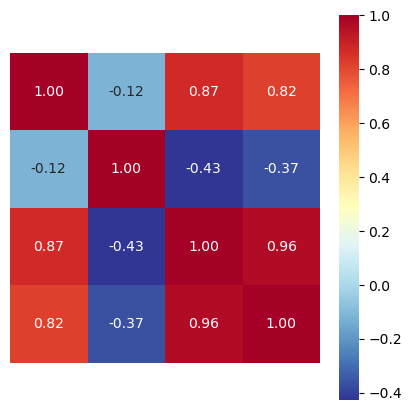

In [232]:

fig, ax = plt.subplots(figsize = (5,5))
sns.heatmap(np.corrcoef(iris_data_array.T),   
            cmap = 'RdYlBu_r', # 指定色谱
            annot = True,      # 注释
            ax = ax,           # 指定轴
            fmt = ".2f",       # 注释数值的格式
            square = True,     # 热图方格为正方形
            xticklabels = [],  # 不显示横轴标签
            yticklabels = [],  # 不显示纵轴标签
            cbar = True)       # 显示色谱条

fig.savefig('Figures/鸢尾花数据相关性系数矩阵.svg', format='svg')

请大家自行学习如下函数：  
numpy.percentile()  
numpy.quantile()  
numpy.median()   
numpy.nanmean()  
numpy.nanmedian()  
numpy.nanstd()  
numpy.nanvar()  

## 参考阅读

关于广播原则，请参考：  
https://numpy.org/doc/stable/user/basics.broadcasting.html  
有关数学函数，请参考：  
https://numpy.org/doc/stable/reference/routines.math.html  
有关统计函数，请参考：  
https://numpy.org/doc/stable/reference/routines.statistics.html  
有关逻辑函数，请参考：  
https://numpy.org/doc/stable/reference/routines.logic.html  

In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 1 Python for Beginners  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023